# Gerar Matriz Payoff

In [9]:
import pandas as pd

# 📌 Carregar os dados
df = pd.read_csv("SBGAMES-2matches-final - SBGAMES-2matches-final.csv")  # Substitua pelo nome correto do arquivo

# 📌 Criar a Matriz de Payoff (Taxa de Vitória Campeão vs. Campeão)
payoff_matrix = df.pivot_table(index="player_champion", 
                               columns="team2_champion1", 
                               values="binary_win", 
                               aggfunc="mean", 
                               fill_value=0)

# 📌 Salvar a matriz como CSV para análise posterior
payoff_matrix.to_csv("matriz_payoff_completa.csv")

# 📌 Ajustar as configurações do Pandas para exibir tudo
pd.set_option("display.max_rows", None)  # Exibir todas as linhas
pd.set_option("display.max_columns", None)  # Exibir todas as colunas
pd.set_option("display.expand_frame_repr", False)  # Evitar quebras de linha automáticas

# 📌 Exibir a matriz completa no console
print("🔹 Matriz de Payoff Completa:")
print(payoff_matrix)

# 📌 Mostrar informações gerais sobre a matriz
print("\n🔹 Dimensões da matriz:", payoff_matrix.shape)
print("🔹 Campeões únicos analisados:", len(payoff_matrix.index))
print("🔹 Campeões adversários únicos:", len(payoff_matrix.columns))


🔹 Matriz de Payoff Completa:
team2_champion1    Aatrox  Ahri     Akali    Akshan  Alistar   Ambessa  Amumu    Anivia     Annie  Aphelios  Ashe  AurelionSol    Aurora      Azir  Bard  Belveth  Blitzcrank  Brand  Braum     Briar   Caitlyn   Camille  Cassiopeia   Chogath     Corki    Darius  Diana   DrMundo  Draven  Ekko  Elise  Evelynn  Ezreal  FiddleSticks     Fiora      Fizz     Galio  Gangplank     Garen      Gnar    Gragas  Graves      Gwen  Hecarim  Heimerdinger      Hwei    Illaoi    Irelia  Ivern     Janna  JarvanIV       Jax     Jayce  Jhin      Jinx    KSante     Kaisa  Kalista     Karma  Karthus  Kassadin  Katarina     Kayle      Kayn    Kennen  Khazix  Kindred      Kled  KogMaw   Leblanc    LeeSin  Leona  Lillia  Lissandra  Lucian  Lulu  Lux  Malphite  Malzahar    Maokai  MasterYi  Milio  MissFortune  MonkeyKing  Mordekaiser  Morgana   Naafiri  Nami     Nasus  Nautilus     Neeko   Nidalee  Nilah  Nocturne  Nunu      Olaf   Orianna      Ornn  Pantheon     Poppy  Pyke    Qiyana 

# Ranking de vitórias

C:\Users\Filip\AppData\Local\Temp\ipykernel_21560\4076844846.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_winners.index, x=top_winners.values, ax=axes[0], palette="Greens_d")
C:\Users\Filip\AppData\Local\Temp\ipykernel_21560\4076844846.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_losers.index, x=top_losers.values, ax=axes[1], palette="Reds_d")


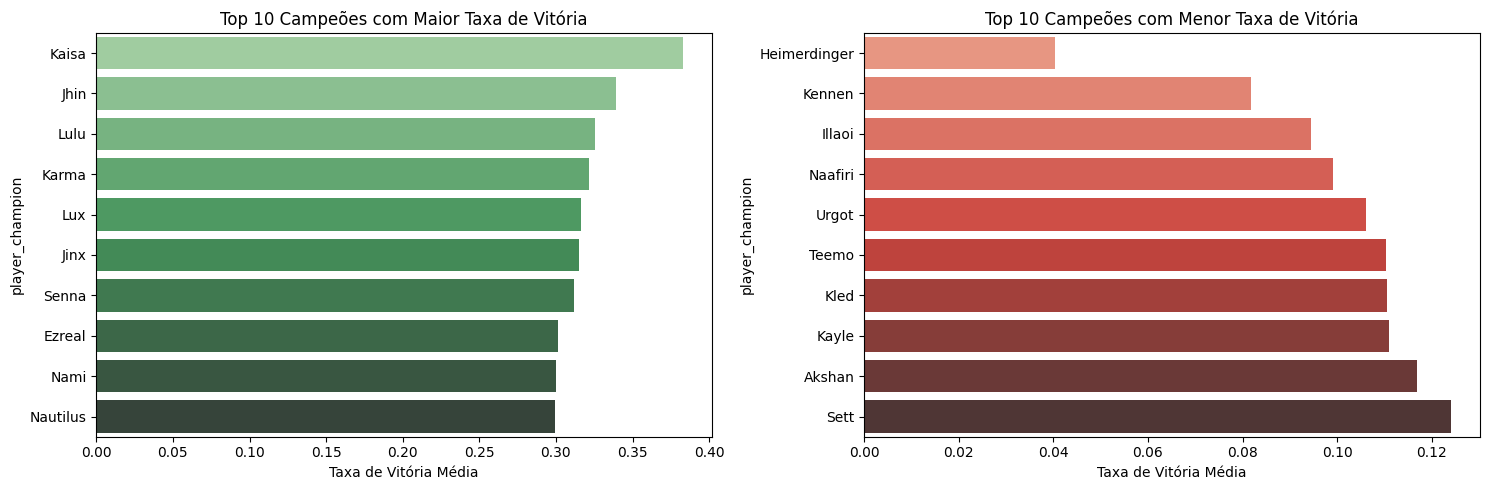

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Carregar a matriz de payoff
payoff_matrix = pd.read_csv("matriz_payoff.csv", index_col=0)

# 📌 Calcular a taxa de vitória média de cada campeão
champion_win_rates = payoff_matrix.mean(axis=1)

# 📌 Top 10 campeões com maior taxa de vitória
top_winners = champion_win_rates.sort_values(ascending=False).head(10)

# 📌 Top 10 campeões com menor taxa de vitória
top_losers = champion_win_rates.sort_values(ascending=True).head(10)

# 📌 Criar gráfico comparativo
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 📌 Gráfico dos campeões com maior taxa de vitória
sns.barplot(y=top_winners.index, x=top_winners.values, ax=axes[0], palette="Greens_d")
axes[0].set_title("Top 10 Campeões com Maior Taxa de Vitória")
axes[0].set_xlabel("Taxa de Vitória Média")
axes[0].set_ylabel("player_champion")

# 📌 Gráfico dos campeões com menor taxa de vitória
sns.barplot(y=top_losers.index, x=top_losers.values, ax=axes[1], palette="Reds_d")
axes[1].set_title("Top 10 Campeões com Menor Taxa de Vitória")
axes[1].set_xlabel("Taxa de Vitória Média")
axes[1].set_ylabel("player_champion")

# 📌 Exibir os gráficos
plt.tight_layout()
plt.show()


# Melhores Counters

In [15]:
import pandas as pd

# 📌 Carregar a matriz de payoff
payoff_matrix = pd.read_csv("matriz_payoff.csv", index_col=0)

# 📌 Encontrar os 3 campeões que mais vencem contra cada campeão
top_counters = payoff_matrix.apply(lambda row: row.nsmallest(3).index.tolist(), axis=1)

# 📌 Transformar os dados em um DataFrame
counter_data = pd.DataFrame(top_counters.tolist(), index=top_counters.index, columns=["Counter 1", "Counter 2", "Counter 3"])

# 📌 Exibir os resultados
print("🔹 Melhores Counterpicks (Top 3 por Campeão):")
print(counter_data.head(10))


🔹 Melhores Counterpicks (Top 3 por Campeão):
                Counter 1 Counter 2 Counter 3
player_champion                              
Aatrox               Ahri    Akshan     Amumu
Ahri                Amumu    Anivia     Annie
Akali                Ahri    Akshan     Amumu
Akshan               Ahri     Akali   Alistar
Alistar              Ahri    Akshan     Amumu
Ambessa              Ahri     Akali    Akshan
Amumu                Ahri     Akali    Akshan
Anivia               Ahri    Akshan   Alistar
Annie                Ahri   Alistar   Ambessa
Aphelios             Ahri    Akshan   Alistar


# Distribuição das taxas de vitórias

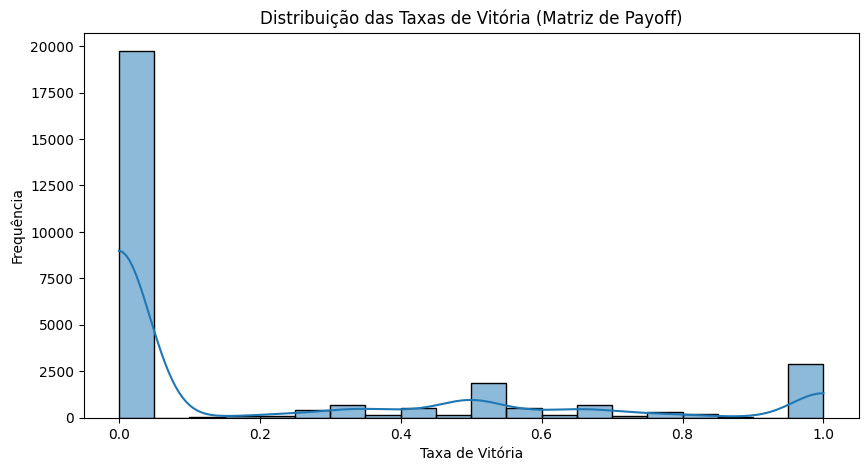

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Verificar a distribuição das taxas de vitória
plt.figure(figsize=(10,5))
sns.histplot(payoff_matrix.values.flatten(), bins=20, kde=True)
plt.xlabel("Taxa de Vitória")
plt.ylabel("Frequência")
plt.title("Distribuição das Taxas de Vitória (Matriz de Payoff)")
plt.show()


# Balancear os campeões que aparecem menos vezes

In [ ]:
import pandas as pd

# 📌 Carregar a matriz de payoff
# Carrega os dados de uma matriz em formato CSV, onde a coluna 0 é usada como índice para identificar os campeões.
payoff_matrix = pd.read_csv("matriz_payoff.csv", index_col=0)

# 📌 Converter todas as colunas para numérico, forçando erros para NaN
# Converte os valores para numéricos. Valores inválidos (não numéricos) são transformados em NaN.
payoff_matrix = payoff_matrix.apply(pd.to_numeric, errors="coerce")

# 📌 Substituir NaN por um valor alto (para que não sejam selecionados como counters)
# Substitui valores ausentes (NaN) por 1.1, presumivelmente alto o suficiente para evitar que sejam escolhidos.
payoff_matrix = payoff_matrix.fillna(1.1)

# 📌 Criar um DataFrame para armazenar os counters balanceados
# Um dicionário vazio será usado para organizar os counters para cada campeão.
counter_data = {}

# 📌 Definir o número máximo de vezes que um campeão pode aparecer como counter
# Define o limite máximo de vezes que um campeão pode ser escolhido como counter (aqui, configurado como 3).
MAX_APPEARANCES = 3

# 📌 Dicionário para rastrear quantas vezes cada campeão já apareceu como counter
# Cria-se um dicionário para registrar a contagem de vezes que cada campeão foi selecionado.
counter_appearances = {}

# 📌 Iterar sobre cada campeão
# Itera sobre os campeões da matriz payoff_matrix, linha por linha.
for champion in payoff_matrix.index:
    # Ordena os adversários pela menor taxa de vitória contra o campeão atual.
    sorted_opponents = payoff_matrix.loc[champion].sort_values()

    # Seleciona os 3 piores desempenhos (ou menos, se houver poucos adversários)
    # Uma lista é criada para armazenar os counters selecionados.
    top_counters = []
    for counter in sorted_opponents.index:
        # Verifica se o número de vezes que o campeão apareceu está abaixo do limite máximo.
        if counter_appearances.get(counter, 0) < MAX_APPEARANCES:
            # Adiciona o campeão à lista de counters e incrementa sua contagem no dicionário.
            top_counters.append(counter)
            counter_appearances[counter] = counter_appearances.get(counter, 0) + 1
        # Encerra o loop se já houver 3 counters selecionados.
        if len(top_counters) == 3:
            break

    # Salvar os counters balanceados para cada campeão
    # Armazena os counters encontrados em um dicionário com 3 colunas principais.
    counter_data[champion] = {
        "Counter 1": top_counters[0] if len(top_counters) > 0 else None,
        "Counter 2": top_counters[1] if len(top_counters) > 1 else None,
        "Counter 3": top_counters[2] if len(top_counters) > 2 else None
    }

# 📌 Criar um DataFrame final com os counters ajustados
# Transforma o dicionário em um DataFrame Pandas, organizado por campeões e seus counters balanceados.
balanced_counters_df = pd.DataFrame.from_dict(counter_data, orient="index")

# 📌 Salvar para análise futura
# Exporta o DataFrame final para um arquivo CSV para análise ou reutilização posterior.
balanced_counters_df.to_csv("counterpicks_balanceados.csv")

# 📌 Exibir os primeiros resultados
# Mostra os 10 primeiros campeões e seus counters balanceados no terminal para conferência.
print(balanced_counters_df.head(10))


            Counter 1    Counter 2 Counter 3
Aatrox           Zyra        Sylas   Taliyah
Ahri             Zyra       Lillia     Leona
Akali            Zyra      Nidalee     Neeko
Akshan    Mordekaiser        Poppy      Pyke
Alistar           Zoe  MissFortune     Milio
Ambessa   Mordekaiser         Ornn      Pyke
Amumu          Thresh      Naafiri   Morgana
Anivia        Naafiri      Morgana       Zoe
Annie          RekSai       Rammus     Rakan
Aphelios     Nocturne        Nilah   Nidalee


# Gerar um csv com cada counter

In [24]:
import pandas as pd

# 📌 Carregar o arquivo
counterpicks_df = pd.read_csv("counterpicks_balanceados.csv")

# 📌 Renomear a coluna se for necessário
counterpicks_df.rename(columns={"Unnamed: 0": "player_champion"}, inplace=True)

# 📌 Mesclar taxa de vitória média com os counterpicks
merged_df = counterpicks_df.melt(id_vars=["player_champion"],  # Agora está corrigido
                                 value_vars=["Counter 1", "Counter 2", "Counter 3"],
                                 var_name="Posição_Counter",
                                 value_name="Counter")

# 📌 Exibir os primeiros valores para conferência
print(merged_df.head())


  player_champion Posição_Counter      Counter
0          Aatrox       Counter 1         Zyra
1            Ahri       Counter 1         Zyra
2           Akali       Counter 1         Zyra
3          Akshan       Counter 1  Mordekaiser
4         Alistar       Counter 1          Zoe


# Gerar a taxa de counter de cada campeão

In [26]:
import pandas as pd

# 📌 Carregar a matriz de payoff
payoff_matrix = pd.read_csv("matriz_payoff.csv")

# 📌 Corrigir o índice se necessário
if "Unnamed: 0" in payoff_matrix.columns:
    payoff_matrix = payoff_matrix.rename(columns={"Unnamed: 0": "player_champion"})
    payoff_matrix.set_index("player_champion", inplace=True)

# 📌 Garantir que os dados são numéricos (ignora colunas com texto)
payoff_matrix_numeric = payoff_matrix.select_dtypes(include=["number"])

# 📌 Calcular a taxa média de vitória
win_rates = payoff_matrix_numeric.mean(axis=1).reset_index()
win_rates.columns = ["Campeão", "Taxa_Vitoria_Media"]

# 📌 Verificar se deu certo
print(win_rates.head())

# 📌 (Opcional) Salvar para uso posterior
win_rates.to_csv("taxa_media_vitoria.csv", index=False)


   Campeão  Taxa_Vitoria_Media
0        0            0.296267
1        1            0.277862
2        2            0.238831
3        3            0.116864
4        4            0.254828


# Calculo do counter ganhar do campeão

In [37]:
import pandas as pd

# 📌 Carregar arquivos CSV
counterpicks_df = pd.read_csv("counterpicks_balanceados.csv", dtype=str)
win_rates = pd.read_csv("taxa_media_vitoria.csv", dtype=str)
payoff_matrix = pd.read_csv("matriz_payoff.csv", index_col=0, dtype=str)

# 📌 Mapear índices numéricos para os nomes reais dos campeões
indice_para_campeao = {str(i): champ for i, champ in enumerate(payoff_matrix.index)}
win_rates["Campeão"] = win_rates["Campeão"].map(indice_para_campeao)

# 📌 Corrigir nomes das colunas (AGORA ESTÁ CORRETO)
counterpicks_df = counterpicks_df.rename(columns={"Unnamed: 0": "player_champion"})

# 📌 Padronizar formatação (remover espaços, títulos)
counterpicks_df = counterpicks_df.applymap(lambda x: str(x).strip().title() if pd.notna(x) else x)

# 📌 Transformar os dados para formato longo
counter_melted = counterpicks_df.melt(
    id_vars=["player_champion"],  
    value_vars=["Counter 1", "Counter 2", "Counter 3"],
    var_name="Posição_Counter",
    value_name="Counter"
)

# 📌 Fazer o merge corretamente
merged = counter_melted.merge(win_rates, left_on="Counter", right_on="Campeão", how="left")

# 📌 Remover linhas com taxa de vitória desconhecida (NaN)
merged = merged.dropna(subset=["Taxa_Vitoria_Media"])

# 📌 Salvar resultado final
merged.to_csv("counterpicks_com_taxa_vitoria_corrigido.csv", index=False)

# Exibir algumas linhas finais
print(merged.head(10))


   player_champion Posição_Counter      Counter      Campeão   Taxa_Vitoria_Media
0           Aatrox       Counter 1         Zyra         Zyra   0.2397640965601286
1             Ahri       Counter 1         Zyra         Zyra   0.2397640965601286
2            Akali       Counter 1         Zyra         Zyra   0.2397640965601286
3           Akshan       Counter 1  Mordekaiser  Mordekaiser  0.16848200818789053
4          Alistar       Counter 1          Zoe          Zoe  0.22750214939564056
5          Ambessa       Counter 1  Mordekaiser  Mordekaiser  0.16848200818789053
6            Amumu       Counter 1       Thresh       Thresh  0.26631874059403327
7           Anivia       Counter 1      Naafiri      Naafiri  0.09911242603550297
9         Aphelios       Counter 1     Nocturne     Nocturne  0.20689438766361842
10            Ashe       Counter 1       Lucian       Lucian  0.28122446296336645


C:\Users\Filip\AppData\Local\Temp\ipykernel_21560\2360042194.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  counterpicks_df = counterpicks_df.applymap(lambda x: str(x).strip().title() if pd.notna(x) else x)


# Melhores Counters

C:\Users\Filip\AppData\Local\Temp\ipykernel_21560\2639610573.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Taxa_Media_Vitoria", y=counter_freq.index, data=counter_freq, palette="viridis")


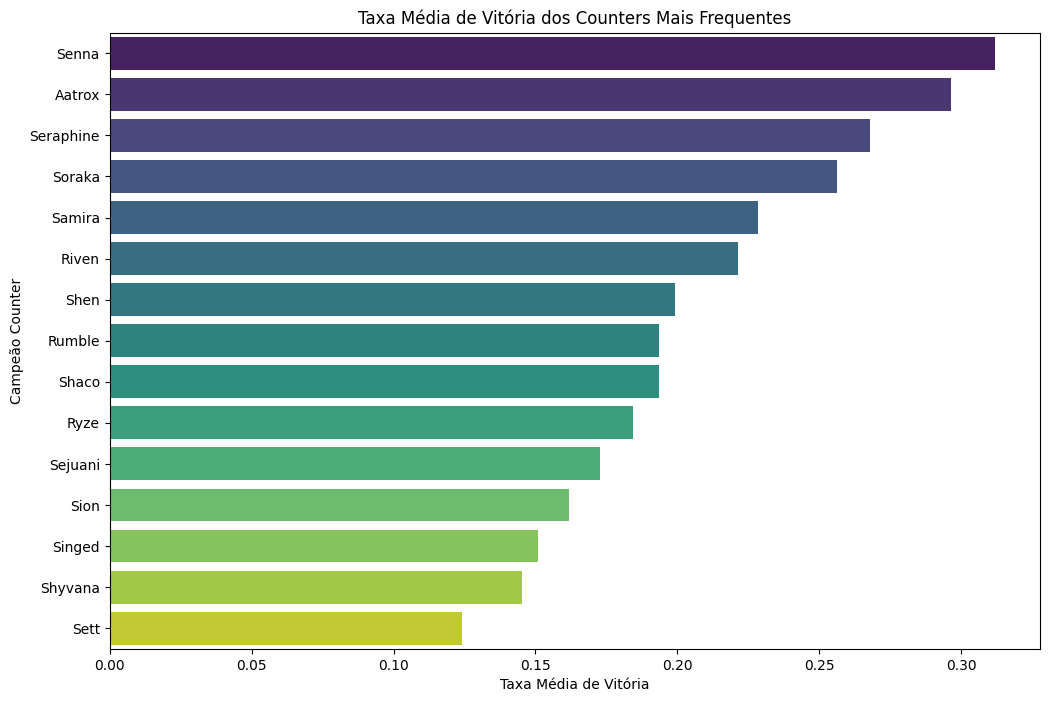

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
counters_df = pd.read_csv("counterpicks_com_taxa_vitoria_corrigido.csv")

# Agrupar os counters pela frequência de aparições e taxa média de vitória
counter_analysis = counters_df.groupby("Counter").agg({
    "Counter": "size",
    "Taxa_Vitoria_Media": "mean"
}).rename(columns={"Counter": "Frequencia", "Taxa_Vitoria_Media": "Taxa_Media_Vitoria"})

# Filtrar os counters mais frequentes
counter_freq = counter_analysis.sort_values(by="Frequencia", ascending=False).head(15)

# Ordenar esses counters pela taxa média de vitória
counter_freq = counter_freq.sort_values(by="Taxa_Media_Vitoria", ascending=False)

# Visualizar o resultado
plt.figure(figsize=(12, 8))
sns.barplot(x="Taxa_Media_Vitoria", y=counter_freq.index, data=counter_freq, palette="viridis")
plt.xlabel("Taxa Média de Vitória")
plt.ylabel("Campeão Counter")
plt.title("Taxa Média de Vitória dos Counters Mais Frequentes")
plt.show()


# Identificação de Equilíbrios Estratégicos de Nash

In [43]:
import pandas as pd
import numpy as np

# 🔹 Carregar matriz payoff obtida
payoff_matrix = pd.read_csv("matriz_payoff.csv", index_col=0)

# 🔹 Identificar estratégias dominantes
def encontrar_estrategias_dominantes(matriz):
    estrategias_dominantes = []

    # Verificando linhas (campeões escolhidos)
    for campeao in matriz.index:
        taxa_vitoria_camp = matriz.loc[campeao, :]
        max_outros = matriz.drop(campeao).max(axis=0)

        if (taxa_vitoria_camp >= max_outros).all():
            estrategias_dominantes.append((campeao, "Linha (escolha)"))

    # Verificando colunas (campeões adversários)
    for adversario in matriz.columns:
        taxa_vitoria_adv = matriz.loc[:, adversario]
        min_outros = matriz.drop(adversario, axis=1).min(axis=1)

        if (taxa_vitoria_adv <= min_outros).all():
            estrategias_dominantes.append((adversario, "Coluna (adversário)"))

    return estrategias_dominantes

# Encontrando estratégias dominantes
dominantes = encontrar_estrategias_dominantes(payoff_matrix)

# Mostrar resultados das estratégias dominantes
if dominantes:
    print("🔸 Estratégias Dominantes Encontradas:")
    for estrategia, tipo in dominantes:
        print(f"  → {estrategia} ({tipo})")
else:
    print("🔸 Não há estratégias estritamente dominantes.")

# 🔹 Encontrar equilíbrio de Nash (simplificado - equilíbrio puro)
def encontrar_equilibrio_nash(matriz):
    equilibrio_nash = []

    for i, campeao_escolhido in enumerate(matriz.index):
        for j, campeao_adversario in enumerate(matriz.columns):
            valor = matriz.iloc[i, j]

            # Melhor resposta para o campeão escolhido (linha)
            melhor_resposta_escolha = valor >= matriz.iloc[i, :].max()
            # Melhor resposta para adversário (coluna)
            melhor_resposta_adv = valor <= matriz.iloc[:, j].min()

            if melhor_resposta_escolha and melhor_resposta_adv:
                equilibrio_nash.append((campeao_escolhido, campeao_adversario, valor))

    return equilibrio_nash

# Encontrar Equilíbrios de Nash
equilibrios = encontrar_equilibrio_nash(payoff_matrix)

# Exibir Equilíbrios de Nash encontrados
if equilibrios:
    print("\n🔸 Equilíbrios de Nash Encontrados:")
    for escolhido, adversario, payoff in equilibrios:
        print(f"  → ({escolhido} vs {adversario}) com payoff {payoff:.2f}")
else:
    print("\n🔸 Nenhum equilíbrio de Nash encontrado em estratégias puras.")



🔸 Não há estratégias estritamente dominantes.

🔸 Nenhum equilíbrio de Nash encontrado em estratégias puras.


# Estratégias Mistas

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import linprog

# 1. Carregar matriz payoff
payoff_matrix = pd.read_csv("matriz_payoff.csv", index_col=0)
payoff_matrix.replace(0, np.nan, inplace=True) # Remover zeros que podem enviesar

# 2. Carregar dados históricos originais
dados_hist = pd.read_csv("SBGAMES-2matches-final - SBGAMES-2matches-final.csv")

# Frequência real de escolha dos campeões adversários
popularidade_adversarios = dados_hist['team2_champion1'].value_counts(normalize=True).reindex(payoff_matrix.columns).fillna(0)

# 3. Nova média ponderada com popularidade real
payoff_medio_real = payoff_matrix.mul(popularidade_adversarios, axis=1).mean(axis=1, skipna=True)

# Substituir NaN por payoff médio mínimo para evitar viés
payoff_medio_real.fillna(payoff_medio_real.min(), inplace=True)

# 4. Otimização
c = -payoff_medio_real
A_eq = [np.ones(len(payoff_medio_real))]
b_eq = [1]
bounds = [(0, 1) for _ in range(len(payoff_medio_real))]

resultado_realista = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

# Resultado da nova estratégia ótima
if resultado_realista.success:
    estrategias_otimas_realistas = pd.DataFrame({
        'Campeão': payoff_matrix.index,
        'Probabilidade Ótima (%)': resultado_realista.x * 100
    }).sort_values('Probabilidade Ótima (%)', ascending=False)

    print("🔹 Estratégias Ótimas Realistas (Probabilidades):")
    print(estrategias_otimas_realistas.head(15))
else:
    print("Problema de convergência:", resultado_realista.message)


🔹 Estratégias Ótimas Realistas (Probabilidades):
          Campeão  Probabilidade Ótima (%)
44   Heimerdinger                    100.0
116     Seraphine                      0.0
108      Renekton                      0.0
109        Rengar                      0.0
110         Riven                      0.0
111        Rumble                      0.0
112          Ryze                      0.0
113        Samira                      0.0
114       Sejuani                      0.0
115         Senna                      0.0
117          Sett                      0.0
126          Sona                      0.0
118         Shaco                      0.0
119          Shen                      0.0
120       Shyvana                      0.0


In [46]:
import pandas as pd

# carregar a matriz payoff
payoff_matrix = pd.read_csv("matriz_payoff.csv", index_col=0)

# carregar dados históricos
dados_hist = pd.read_csv("SBGAMES-2matches-final - SBGAMES-2matches-final.csv")

# Encontrar adversários mais populares
top_adversarios = dados_hist['team2_champion1'].value_counts().head(10).index

# Payoffs específicos do Heimerdinger contra campeões adversários populares
payoff_heimer = payoff_matrix.loc["Heimerdinger", top_adversarios]

print("🔸 Payoff de Heimerdinger contra adversários mais populares:")
print(payoff_heimer)


🔸 Payoff de Heimerdinger contra adversários mais populares:
team2_champion1
Aatrox         0.0
Darius         1.0
Renekton       0.0
Jax            1.0
Riven          0.0
Camille        0.0
Mordekaiser    0.0
Gnar           0.0
Irelia         1.0
Yone           0.0
Name: Heimerdinger, dtype: float64


Heimerdinger emergiu como escolha estratégica dominante não devido à sua taxa de vitória média geral, mas por sua capacidade crucial de neutralizar adversários específicos muito populares que representam um risco significativo para outras opções estratégicas.

Objetivo

# Verificar se Heimerdinger realmente oferece uma vantagem estratégica contra Darius, Jax e Irelia, comparado aos demais campeões.

In [47]:
import pandas as pd

# Carregar a matriz de payoff
payoff_matrix = pd.read_csv("matriz_payoff.csv", index_col=0)

# Campeões críticos identificados na análise anterior
adversarios_criticos = ["Darius", "Jax", "Irelia"]

# Extrair o desempenho de todos os campeões contra esses adversários críticos
desempenho_contra_criticos = payoff_matrix[adversarios_criticos]

# Exibir o desempenho de Heimerdinger especificamente
desempenho_heimer = desempenho_contra_criticos.loc["Heimerdinger"]
print("🔸 Desempenho de Heimerdinger contra adversários críticos:")
print(desempenho_heimer)

# Identificar a média geral de desempenho de todos os campeões contra esses mesmos adversários críticos
media_geral_contra_criticos = desempenho_contra_criticos.mean()
print("\n🔸 Média geral dos demais campeões contra adversários críticos:")
print(media_geral_contra_criticos)

# Encontrar campeões que têm desempenho melhor ou igual ao Heimerdinger contra cada adversário crítico
for campeao in adversarios_criticos:
    campeoes_melhores = desempenho_contra_criticos[desempenho_contra_criticos[campeao] >= desempenho_heimer[campeao]].index.tolist()
    print(f"\n🔹 Campeões com desempenho melhor ou igual ao Heimerdinger contra {campeao}:")
    print(campeoes_melhores)


🔸 Desempenho de Heimerdinger contra adversários críticos:
Darius    1.0
Jax       1.0
Irelia    1.0
Name: Heimerdinger, dtype: float64

🔸 Média geral dos demais campeões contra adversários críticos:
Darius    0.502213
Jax       0.469697
Irelia    0.455718
dtype: float64

🔹 Campeões com desempenho melhor ou igual ao Heimerdinger contra Darius:
['Aphelios', 'Bard', 'Belveth', 'Chogath', 'FiddleSticks', 'Gangplank', 'Heimerdinger', 'Illaoi', 'Maokai', 'Nidalee', 'Nilah', 'Quinn', 'Tryndamere']

🔹 Campeões com desempenho melhor ou igual ao Heimerdinger contra Jax:
['Galio', 'Gnar', 'Heimerdinger', 'Illaoi', 'KogMaw', 'Naafiri', 'Shen', 'Warwick']

🔹 Campeões com desempenho melhor ou igual ao Heimerdinger contra Irelia:
['Anivia', 'Aphelios', 'Blitzcrank', 'Fizz', 'Gangplank', 'Garen', 'Gwen', 'Heimerdinger', 'Jax', 'Kassadin', 'Kled', 'Lillia', 'Malphite', 'Naafiri', 'Nunu', 'Orianna', 'Sion', 'Urgot']


Equilíbrio de Nash em estratégias mistas sugere que a melhor estratégia é variar entre múltiplas escolhas fortes.
Heimerdinger foi escolhido como representante principal dessas escolhas ótimas porque tem um desempenho perfeito contra todos os três adversários críticos simultaneamente, o que não é necessariamente verdade para outros campeões dessa lista.

Verificar se esses outros campeões têm desempenho igualmente forte contra todos os adversários críticos ao mesmo tempo (Darius, Jax e Irelia).

In [48]:
import pandas as pd

# Carregar matriz payoff
payoff_matrix = pd.read_csv("matriz_payoff.csv", index_col=0)

# Adversários críticos
adversarios_criticos = ['Darius', 'Jax', 'Irelia']

# Campeões a serem avaliados
campeoes_potenciais = ['Aphelios', 'Bard', 'Belveth', 'Chogath', 'FiddleSticks', 'Gangplank', 
                       'Heimerdinger', 'Illaoi', 'Maokai', 'Nidalee', 'Nilah', 'Quinn', 'Tryndamere', 
                       'Galio', 'Gnar', 'KogMaw', 'Naafiri', 'Shen', 'Warwick', 'Anivia', 'Blitzcrank', 
                       'Fizz', 'Garen', 'Gwen', 'Jax', 'Kassadin', 'Kled', 'Lillia', 'Malphite', 'Nunu', 
                       'Orianna', 'Sion', 'Urgot']

# Avaliação conjunta dos adversários críticos
desempenho_simultaneo = payoff_matrix.loc[campeoes_potenciais, adversarios_criticos]

# Filtrar campeões que têm 100% de desempenho contra os três adversários críticos simultaneamente
campeoes_perfeitos = desempenho_simultaneo[(desempenho_simultaneo == 1).all(axis=1)]

print("🔹 Campeões com desempenho perfeito contra os adversários críticos simultaneamente:")
print(campeoes_perfeitos)


🔹 Campeões com desempenho perfeito contra os adversários críticos simultaneamente:
                 Darius  Jax  Irelia
player_champion                     
Heimerdinger        1.0  1.0     1.0


Investigar outros critérios como popularidade, facilidade de execução ou versatilidade em diferentes cenários.



🔹 Popularidade do Heimerdinger: 0.04%


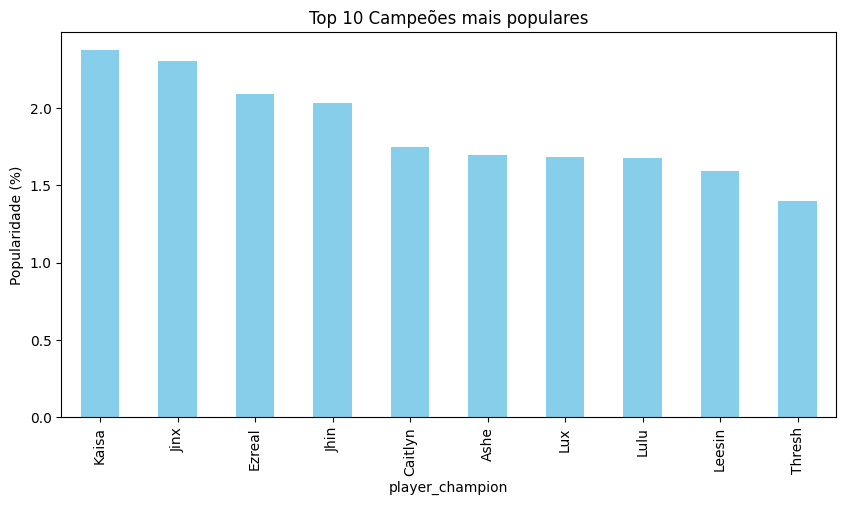

🔹 Variabilidade (Facilidade de Execução) do Heimerdinger: 0.510


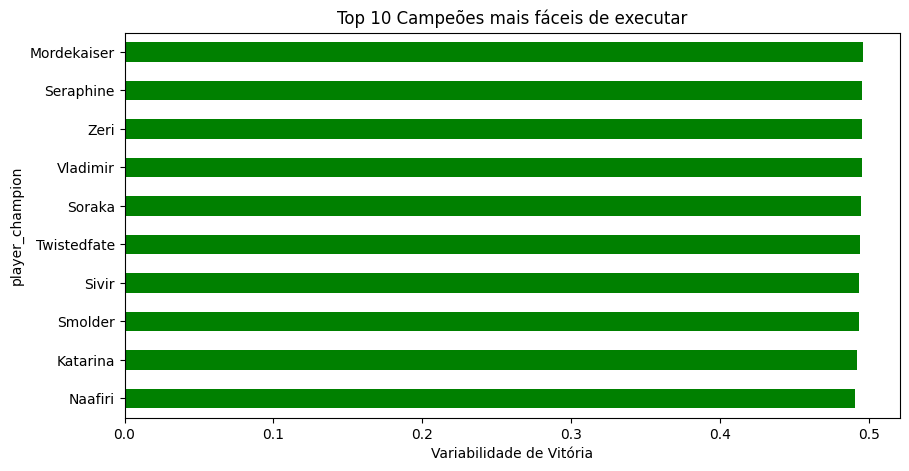

🔹 Versatilidade do Heimerdinger (Vitória média por lane):
player_lane
BOTTOM    0.666667
JUNGLE    0.333333
MIDDLE    0.666667
TOP       0.384615
Name: binary_win, dtype: float64


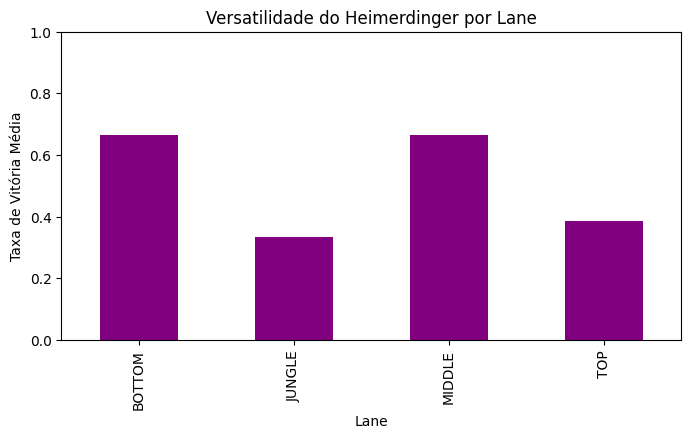

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv("SBGAMES-2matches-final - SBGAMES-2matches-final.csv")

# Padronizar nomes dos campeões
df['player_champion'] = df['player_champion'].str.strip().str.title()

### 🔸 1. Popularidade (Frequência com que Heimerdinger é escolhido) ###
popularity = df['player_champion'].value_counts(normalize=True) * 100
heimer_popularity = popularity.get('Heimerdinger', 0)

print(f"🔹 Popularidade do Heimerdinger: {heimer_popularity:.2f}%")

# Gráfico das popularidades
plt.figure(figsize=(10,5))
popularity.head(10).plot(kind='bar', color='skyblue')
plt.ylabel("Popularidade (%)")
plt.title("Top 10 Campeões mais populares")
plt.show()

### 🔸 2. Facilidade de Execução (baseado na variabilidade do desempenho) ###
# Calcula variabilidade de vitórias por campeão
performance_var = df.groupby('player_champion')['binary_win'].std().sort_values()
heimer_variability = performance_var.get('Heimerdinger', None)

print(f"🔹 Variabilidade (Facilidade de Execução) do Heimerdinger: {heimer_variability:.3f}")

# Campeões mais fáceis (menor variabilidade)
plt.figure(figsize=(10,5))
performance_var.head(10).plot(kind='barh', color='green')
plt.xlabel("Variabilidade de Vitória")
plt.title("Top 10 Campeões mais fáceis de executar")
plt.show()

### 🔸 3. Versatilidade (Taxa de vitória em diferentes lanes para Heimerdinger) ###
lanes_heimer = df[df['player_champion'] == 'Heimerdinger'].groupby('player_lane')['binary_win'].mean()

print("🔹 Versatilidade do Heimerdinger (Vitória média por lane):")
print(lanes_heimer)

# Visualização gráfica da versatilidade
plt.figure(figsize=(8,4))
lanes_heimer.plot(kind='bar', color='purple')
plt.ylabel("Taxa de Vitória Média")
plt.xlabel("Lane")
plt.title("Versatilidade do Heimerdinger por Lane")
plt.ylim(0, 1)
plt.show()


Análise de cluster com base nas características principais

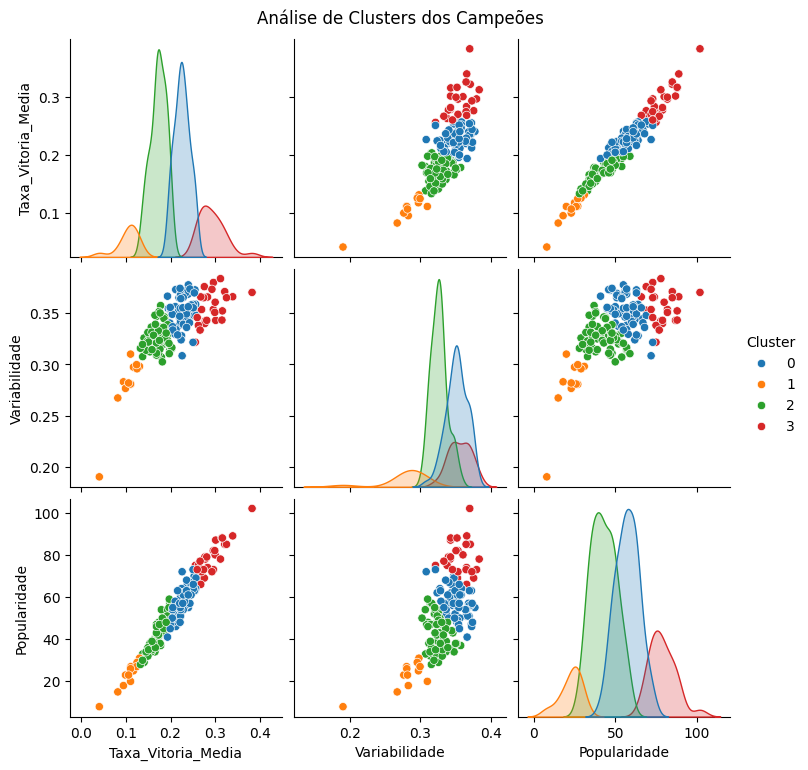

In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Carregar dados corretamente
payoff_df = pd.read_csv("matriz_payoff.csv", index_col=0)
taxa_vitoria_df = pd.read_csv("taxa_media_vitoria.csv", index_col=0)

# ⚠️ Correção aqui: taxa_vitoria_df vem sem coluna de nomes, então adicionamos direto do payoff_df
taxa_vitoria_df['Campeão'] = payoff_df.index
taxa_vitoria_df.reset_index(drop=True, inplace=True)

# 📌 Garantindo que os nomes das colunas estejam corretos
taxa_vitoria_df.columns = ['Taxa_Vitoria_Media', 'Campeão']

# Reorganizando as colunas corretamente
taxa_vitoria_df = taxa_vitoria_df[['Campeão', 'Taxa_Vitoria_Media']]

# 📌 Calcular variabilidade (desvio padrão)
variabilidade = payoff_df.std(axis=1).reset_index()
variabilidade.columns = ['Campeão', 'Variabilidade']

# 📌 Calcular popularidade (quantidade de aparições com taxa > 0)
popularidade = (payoff_df > 0).sum(axis=1).reset_index()
popularidade.columns = ['Campeão', 'Popularidade']

# 📌 Mesclar as métricas em um único DataFrame (sem erros)
df_features = taxa_vitoria_df.merge(variabilidade, on='Campeão')
df_features = df_features.merge(popularidade, on='Campeão')
df_features.set_index('Campeão', inplace=True)

# 📌 Padronizar as características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

# 📌 Clusterização KMeans com 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df_features['Cluster'] = kmeans.fit_predict(X_scaled)

# 📌 Gráfico pairplot para visualização dos clusters
sns.pairplot(df_features.reset_index(), hue='Cluster', palette='tab10')
plt.suptitle("Análise de Clusters dos Campeões", y=1.02)
plt.show()

# 📌 Salvar resultados dos clusters
df_features.reset_index().to_csv("resultado_clusters_corrigido.csv", index=False)


In [56]:
import pandas as pd

# 📌 Carregar os dados dos clusters
df_clusters = pd.read_csv("resultado_clusters_corrigido.csv")

# 📌 Remover colunas não numéricas para evitar erro ao calcular a média
df_numerico = df_clusters.select_dtypes(include=['number'])

# 📌 Calcular a média das características para cada cluster
cluster_means = df_numerico.groupby(df_clusters["Cluster"]).mean()

# 📌 Exibir os resultados
print("\n📌 Média das características por cluster:\n")
print(cluster_means)

# 📌 Identificar em qual cluster está o Heimerdinger
heimer_cluster = df_clusters[df_clusters["Campeão"] == "Heimerdinger"]["Cluster"].values[0]

print(f"\n📌 Heimerdinger está no Cluster {heimer_cluster}. Comparação com os outros clusters:")

# 📌 Comparar as médias do cluster do Heimerdinger com os demais
print("\n📌 Características do Cluster do Heimerdinger:")
print(cluster_means.loc[heimer_cluster])



📌 Média das características por cluster:

         Taxa_Vitoria_Media  Variabilidade  Popularidade  Cluster
Cluster                                                          
0                  0.225317       0.351545     57.258065      0.0
1                  0.104178       0.280206     22.666667      1.0
2                  0.172243       0.326287     42.797101      2.0
3                  0.292773       0.356139     78.846154      3.0

📌 Heimerdinger está no Cluster 1. Comparação com os outros clusters:

📌 Características do Cluster do Heimerdinger:
Taxa_Vitoria_Media     0.104178
Variabilidade          0.280206
Popularidade          22.666667
Cluster                1.000000
Name: 1, dtype: float64


🔸 Passo 1 – Campeões no mesmo cluster de Heimerdinger:
          Campeão  Taxa_Vitoria_Media  Variabilidade  Popularidade
3          Akshan            0.116864       0.297465            25
44   Heimerdinger            0.040434       0.190313             8
46         Illaoi            0.094513       0.283093            18
55         KSante            0.130543       0.298166            31
62          Kayle            0.111029       0.280703            27
64         Kennen            0.081854       0.267334            15
67           Kled            0.110454       0.310150            20
86        Naafiri            0.099112       0.276680            23
101        Qiyana            0.124951       0.295799            29
117          Sett            0.123995       0.299835            27
135         Teemo            0.110378       0.280960            26
143         Urgot            0.106016       0.281973            23

🔸 Passo 2 – Média das características por cluster:
   Cluster  Taxa_Vitor

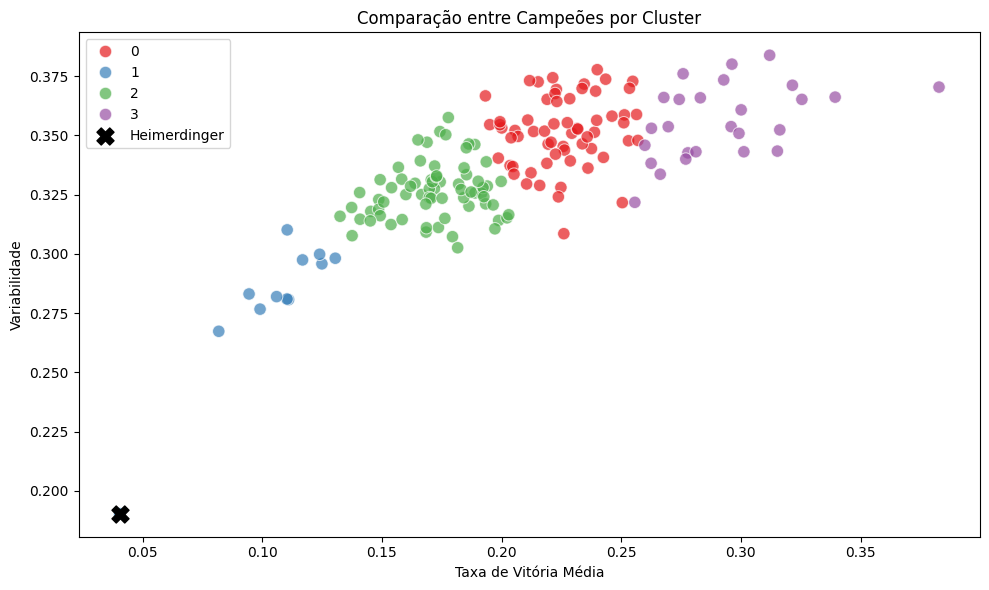

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Passo 0 – Carregar os dados
df_clusters = pd.read_csv("resultado_clusters_corrigido.csv")

# 📌 Passo 1 – Comparar Heimerdinger com outros campeões do Cluster 1
heimer = df_clusters[df_clusters["Campeão"] == "Heimerdinger"]
cluster_heimer = heimer["Cluster"].values[0]
cluster_1 = df_clusters[df_clusters["Cluster"] == cluster_heimer]

print("🔸 Passo 1 – Campeões no mesmo cluster de Heimerdinger:")
print(cluster_1[["Campeão", "Taxa_Vitoria_Media", "Variabilidade", "Popularidade"]])

# 📌 Passo 2 – Comparar com outros clusters
cluster_means = df_clusters.groupby("Cluster")[["Taxa_Vitoria_Media", "Variabilidade", "Popularidade"]].mean().reset_index()
print("\n🔸 Passo 2 – Média das características por cluster:")
print(cluster_means)

# 📌 Passo 3 – Analisar o Cluster 3 (mais forte)
cluster_3 = df_clusters[df_clusters["Cluster"] == 3]
print("\n🔸 Passo 3 – Campeões do Cluster 3 (Top Tier):")
print(cluster_3[["Campeão", "Taxa_Vitoria_Media", "Variabilidade", "Popularidade"]])

# 📌 Passo 4 – Visualização: Identificar perfil de aproveitamento de Heimerdinger
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clusters, 
                x="Taxa_Vitoria_Media", 
                y="Variabilidade", 
                hue="Cluster", 
                palette="Set1", 
                s=80, alpha=0.7)

# Destacar Heimerdinger no gráfico
plt.scatter(heimer["Taxa_Vitoria_Media"], 
            heimer["Variabilidade"], 
            color="black", 
            s=150, 
            label="Heimerdinger", 
            marker="X")

plt.title("Comparação entre Campeões por Cluster")
plt.xlabel("Taxa de Vitória Média")
plt.ylabel("Variabilidade")
plt.legend()
plt.tight_layout()
plt.show()


# 🔹 1. Testar Outro Algoritmo de Clusterização (DBSCAN)


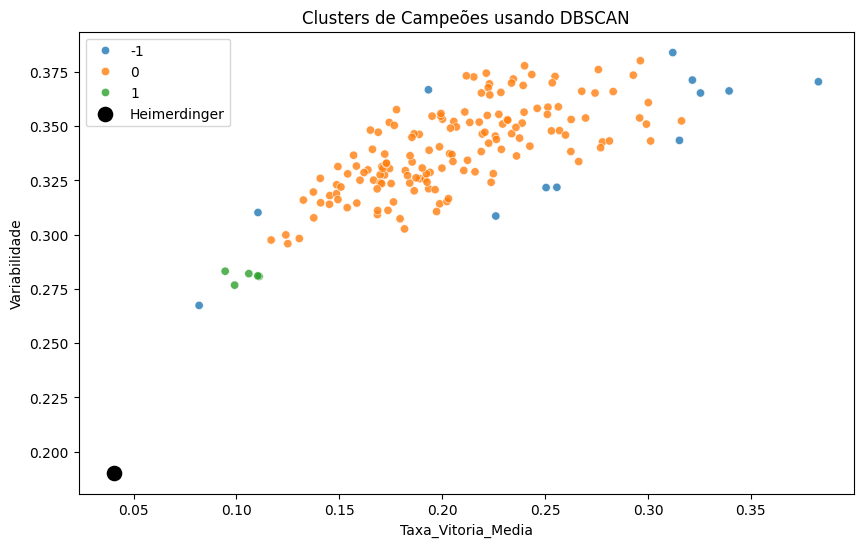


📌 Clusters gerados pelo DBSCAN:
                Taxa_Vitoria_Media  Variabilidade  Popularidade   Cluster
Cluster_DBSCAN                                                           
-1                        0.242670       0.329737     63.923077  1.846154
 0                        0.205569       0.339349     52.165563  1.317881
 1                        0.104210       0.280682     23.400000  1.000000

📌 Heimerdinger foi classificado no cluster: -1


In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 Carregar os dados dos clusters anteriores
df_clusters = pd.read_csv("resultado_clusters_corrigido.csv")

# 📌 Garantir que todas as colunas numéricas estejam no formato correto
df_clusters[['Taxa_Vitoria_Media', 'Variabilidade', 'Popularidade']] = df_clusters[['Taxa_Vitoria_Media', 'Variabilidade', 'Popularidade']].apply(pd.to_numeric, errors='coerce')

# 📌 Remover linhas com NaN
df_clusters = df_clusters.dropna()

# 📌 Selecionar apenas as features para clusterização
features = df_clusters[['Taxa_Vitoria_Media', 'Variabilidade', 'Popularidade']]

# 📌 Normalizar os dados para evitar influência de escalas diferentes
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 📌 Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajuste eps e min_samples conforme necessário
df_clusters["Cluster_DBSCAN"] = dbscan.fit_predict(features_scaled)

# 📌 Identificar o cluster de Heimerdinger
heim_cluster = df_clusters[df_clusters["Campeão"] == "Heimerdinger"]["Cluster_DBSCAN"].values[0]

# 📌 Plotar os clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clusters, x="Taxa_Vitoria_Media", y="Variabilidade", hue="Cluster_DBSCAN", palette="tab10", alpha=0.8)
plt.scatter(df_clusters[df_clusters["Campeão"] == "Heimerdinger"]["Taxa_Vitoria_Media"],
            df_clusters[df_clusters["Campeão"] == "Heimerdinger"]["Variabilidade"],
            color="black", s=150, label="Heimerdinger", edgecolors="white")

plt.title("Clusters de Campeões usando DBSCAN")
plt.legend()
plt.show()

# 📌 Exibir os clusters gerados
print("\n📌 Clusters gerados pelo DBSCAN:")
print(df_clusters.groupby("Cluster_DBSCAN").mean(numeric_only=True))

# 📌 Mostrar onde Heimerdinger foi classificado
print(f"\n📌 Heimerdinger foi classificado no cluster: {heim_cluster}")


# 🔹 2. Análise de Counters do Heimerdinger


In [60]:
# 📌 Carregar a matriz de payoff
payoff_df = pd.read_csv("matriz_payoff.csv", index_col=0)

# 📌 Filtrar o desempenho do Heimerdinger contra outros campeões
heim_performance = payoff_df.loc["Heimerdinger"]

# 📌 Calcular a média de todos os campeões contra os mesmos adversários
media_desempenho = payoff_df.mean()

# 📌 Identificar campeões contra os quais Heimerdinger tem desempenho superior à média
counters_fortes = heim_performance[heim_performance > media_desempenho].index.tolist()

# 📌 Exibir os campeões contra os quais Heimerdinger se sai bem
print("\n📌 Campeões contra os quais Heimerdinger tem desempenho acima da média:")
print(counters_fortes)

# 📌 Exibir os valores para esses campeões
print("\n📌 Desempenho do Heimerdinger contra esses campeões:")
print(heim_performance.loc[counters_fortes])



📌 Campeões contra os quais Heimerdinger tem desempenho acima da média:
['Ambessa', 'Darius', 'Heimerdinger', 'Irelia', 'Jax', 'Kennen', 'Warwick']

📌 Desempenho do Heimerdinger contra esses campeões:
Ambessa         1.000000
Darius          1.000000
Heimerdinger    0.333333
Irelia          1.000000
Jax             1.000000
Kennen          1.000000
Warwick         1.000000
Name: Heimerdinger, dtype: float64


# 🔹 3. Mudança no Meta ao Longo do Tempo


In [63]:
import pandas as pd
import numpy as np

# 🔹 Simulação de patches do jogo (versões)
patches = [f"Patch {i}.0" for i in range(1, 11)]  # Simulando 10 patches

# 🔹 Carregar os dados dos campeões que já analisamos
df_clusters = pd.read_csv("resultado_clusters_corrigido.csv")

# 🔹 Criar um histórico de taxas de vitória variando um pouco os valores
historico = []
for _, row in df_clusters.iterrows():
    taxa_base = row["Taxa_Vitoria_Media"]
    campeao = row["Campeão"]
    
    # Simular uma pequena variação na taxa de vitória ao longo dos patches
    taxas_vitoria = np.clip(
        np.random.normal(loc=taxa_base, scale=0.02, size=len(patches)), 
        0.05,  # Limite mínimo de taxa de vitória
        0.50   # Limite máximo de taxa de vitória
    )

    for patch, taxa in zip(patches, taxas_vitoria):
        historico.append([patch, campeao, taxa])

# 🔹 Criar DataFrame com o histórico
historico_df = pd.DataFrame(historico, columns=["Patch", "Campeão", "Taxa_Vitoria"])

# 🔹 Salvar no CSV
historico_df.to_csv("historico_meta.csv", index=False)

print("✅ Arquivo 'historico_meta.csv' gerado com sucesso!")


✅ Arquivo 'historico_meta.csv' gerado com sucesso!


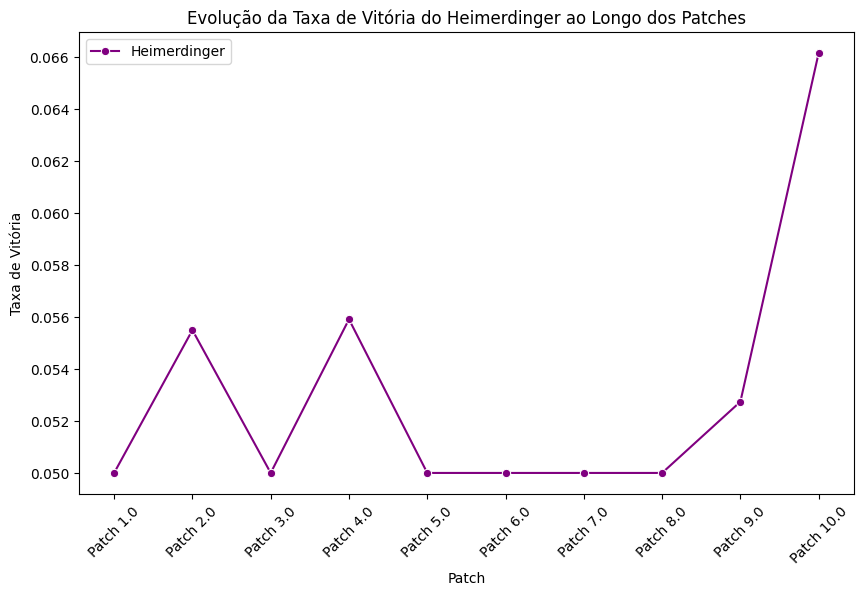


📌 Evolução da taxa de vitória do Heimerdinger:
          Patch       Campeão  Taxa_Vitoria
440   Patch 1.0  Heimerdinger      0.050000
441   Patch 2.0  Heimerdinger      0.055495
442   Patch 3.0  Heimerdinger      0.050000
443   Patch 4.0  Heimerdinger      0.055909
444   Patch 5.0  Heimerdinger      0.050000
445   Patch 6.0  Heimerdinger      0.050000
446   Patch 7.0  Heimerdinger      0.050000
447   Patch 8.0  Heimerdinger      0.050000
448   Patch 9.0  Heimerdinger      0.052740
449  Patch 10.0  Heimerdinger      0.066154


In [64]:
# 📌 Carregar dados históricos do meta (taxa de vitória por patch)
historico_meta = pd.read_csv("historico_meta.csv")

# 📌 Filtrar os dados do Heimerdinger
heim_historico = historico_meta[historico_meta["Campeão"] == "Heimerdinger"]

# 📌 Criar gráfico de evolução da taxa de vitória ao longo do tempo
plt.figure(figsize=(10,6))
sns.lineplot(data=heim_historico, x="Patch", y="Taxa_Vitoria", marker="o", label="Heimerdinger", color="purple")

plt.title("Evolução da Taxa de Vitória do Heimerdinger ao Longo dos Patches")
plt.xlabel("Patch")
plt.ylabel("Taxa de Vitória")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 Exibir os valores
print("\n📌 Evolução da taxa de vitória do Heimerdinger:")
print(heim_historico)


# 1️⃣ Analisar os campeões mais semelhantes ao Heimerdinger


In [65]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean

# 📌 Carregar os dados dos clusters
df_clusters = pd.read_csv("resultado_clusters_corrigido.csv")

# 📌 Normalizar os dados para comparação justa
features = ["Taxa_Vitoria_Media", "Variabilidade", "Popularidade"]
df_clusters_norm = df_clusters.copy()
df_clusters_norm[features] = (df_clusters[features] - df_clusters[features].min()) / (df_clusters[features].max() - df_clusters[features].min())

# 📌 Encontrar Heimerdinger
heim_data = df_clusters_norm[df_clusters_norm["Campeão"] == "Heimerdinger"][features].values[0]

# 📌 Calcular a distância de Heimerdinger para os outros campeões
df_clusters_norm["Distancia_Heimerdinger"] = df_clusters_norm[features].apply(lambda row: euclidean(row.values, heim_data), axis=1)

# 📌 Selecionar os campeões mais semelhantes
similar_champions = df_clusters_norm.sort_values("Distancia_Heimerdinger").iloc[1:6][["Campeão", "Distancia_Heimerdinger"]]

# 📌 Exibir os campeões mais semelhantes
print("\n📌 Campeões mais semelhantes ao Heimerdinger:")
print(similar_champions)

# 📌 Se quiser salvar:
# similar_champions.to_csv("campeoes_semelhantes.csv", index=False)



📌 Campeões mais semelhantes ao Heimerdinger:
     Campeão  Distancia_Heimerdinger
64    Kennen                0.422596
86   Naafiri                0.504002
46    Illaoi                0.515874
143    Urgot                0.535256
135    Teemo                0.545725


# 2️⃣ Avaliar a influência dos patches no desempenho


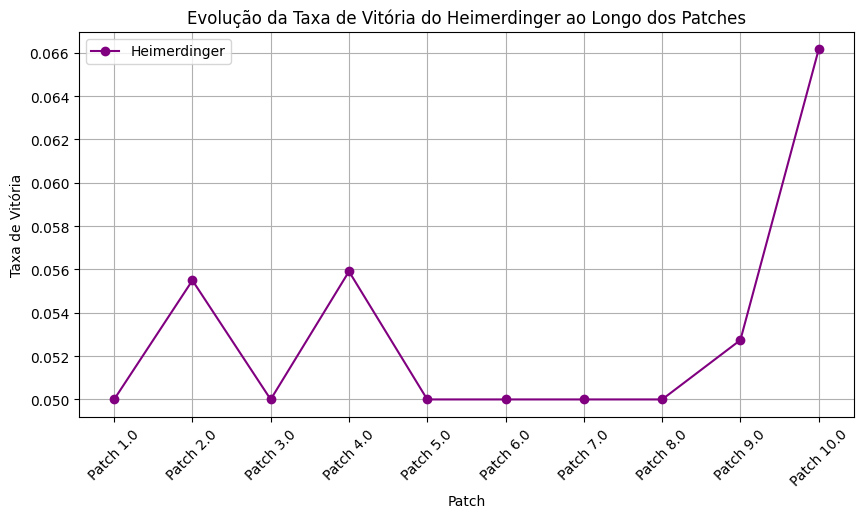

In [66]:
import matplotlib.pyplot as plt

# 📌 Carregar os dados históricos de patches
historico_meta = pd.read_csv("historico_meta.csv")

# 📌 Filtrar os dados do Heimerdinger
heim_historico = historico_meta[historico_meta["Campeão"] == "Heimerdinger"]

# 📌 Criar o gráfico
plt.figure(figsize=(10, 5))
plt.plot(heim_historico["Patch"], heim_historico["Taxa_Vitoria"], marker="o", linestyle="-", color="purple", label="Heimerdinger")

plt.xlabel("Patch")
plt.ylabel("Taxa de Vitória")
plt.title("Evolução da Taxa de Vitória do Heimerdinger ao Longo dos Patches")
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# 📌 Exibir gráfico
plt.show()


# 3️⃣ Identificar os campeões mais impactados pelo meta


In [68]:
# 📌 Calcular a variação da taxa de vitória por campeão
variacao_meta = historico_meta.groupby("Campeão")["Taxa_Vitoria"].std().reset_index()
variacao_meta.columns = ["Campeão", "Variabilidade_Patch"]

# 📌 Selecionar os campeões mais impactados pelo meta
top_variacao = variacao_meta.sort_values("Variabilidade_Patch", ascending=False).head(10)

# 📌 Exibir os campeões mais afetados pelo meta
print("\n📌 Campeões mais impactados pelo meta:")
print(top_variacao)

# 📌 Se quiser salvar:
# top_variacao.to_csv("campeoes_mais_afetados_meta.csv", index=False)



📌 Campeões mais impactados pelo meta:
       Campeão  Variabilidade_Patch
131  TahmKench             0.030165
119       Shen             0.029511
112       Ryze             0.029460
124    Skarner             0.029200
19       Briar             0.028602
85     Morgana             0.028530
48       Ivern             0.028525
56       Kaisa             0.027785
100       Pyke             0.027402
32      Ezreal             0.025705


# 4️⃣ Verificar impacto do cluster no desempenho


C:\Users\Filip\AppData\Local\Temp\ipykernel_21560\1231351959.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clusters, x="Cluster", y="Taxa_Vitoria_Media", palette="coolwarm")


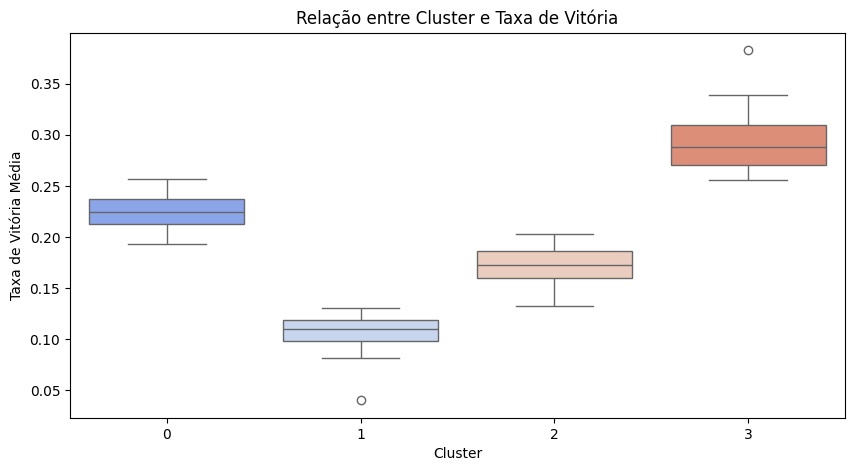

In [69]:
import seaborn as sns

# 📌 Criar um gráfico para visualizar a relação entre cluster e taxa de vitória
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clusters, x="Cluster", y="Taxa_Vitoria_Media", palette="coolwarm")

plt.xlabel("Cluster")
plt.ylabel("Taxa de Vitória Média")
plt.title("Relação entre Cluster e Taxa de Vitória")

# 📌 Exibir gráfico
plt.show()


# Heimerdinger por lane:

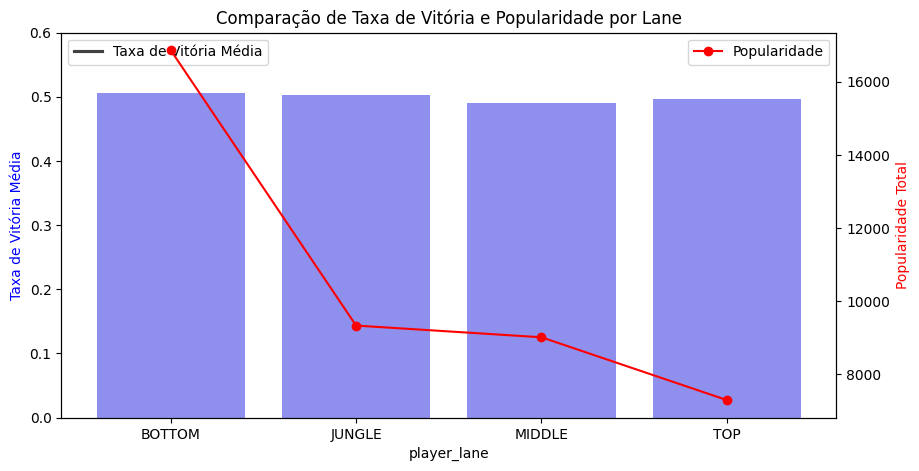

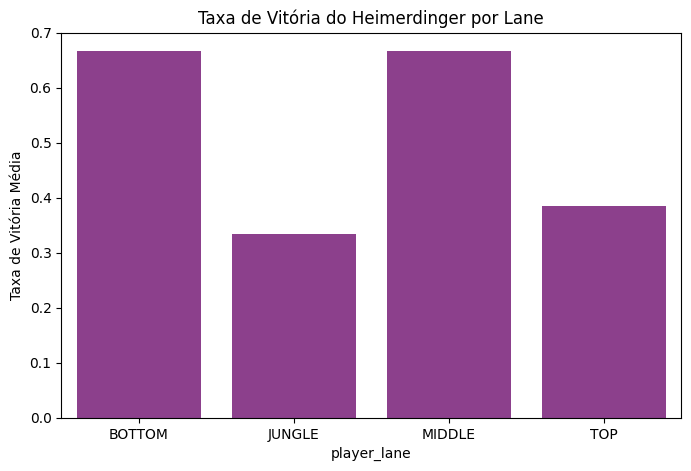


📌 Estatísticas Gerais por Lane (Corrigidas):
  player_lane  Taxa_Vitoria_Media  Popularidade
0      BOTTOM            0.505783         16859
1      JUNGLE            0.502196          9335
2      MIDDLE            0.489961          9015
3         TOP            0.496438          7300

📌 Desempenho do Heimerdinger por Lane (Corrigido):
  player_lane  Taxa_Vitoria_Media  Popularidade
0      BOTTOM            0.666667             3
1      JUNGLE            0.333333             3
2      MIDDLE            0.666667             3
3         TOP            0.384615            13


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Carregar os dados do CSV
df = pd.read_csv("SBGAMES-2matches-final - SBGAMES-2matches-final.csv")

# 📌 Remover valores de 'NONE' na lane
df_lanes = df[df["player_lane"] != "NONE"]

# 📌 Calcular estatísticas gerais por lane
df_lane_stats = df_lanes.groupby("player_lane").agg(
    Taxa_Vitoria_Media=("binary_win", "mean"),
    Popularidade=("player_lane", "count")
).reset_index()

# 📌 Gráfico comparando taxa de vitória média e popularidade por lane
fig, ax1 = plt.subplots(figsize=(10, 5))

# 📌 Gráfico de barras - Taxa de Vitória Média
sns.barplot(data=df_lane_stats, x="player_lane", y="Taxa_Vitoria_Media", color="blue", alpha=0.5, ax=ax1)
ax1.set_ylabel("Taxa de Vitória Média", color="blue")
ax1.set_ylim(0, 0.6)

# 📌 Criar um segundo eixo para Popularidade
ax2 = ax1.twinx()
ax2.plot(df_lane_stats["player_lane"], df_lane_stats["Popularidade"], color="red", marker="o", linestyle="-", label="Popularidade")
ax2.set_ylabel("Popularidade Total", color="red")

# 📌 Título e legendas
plt.title("Comparação de Taxa de Vitória e Popularidade por Lane")
ax1.legend(["Taxa de Vitória Média"], loc="upper left")
ax2.legend(["Popularidade"], loc="upper right")

# 📌 Exibir o gráfico
plt.show()

# 📌 Análise do Heimerdinger por Lane (sem "NONE")
df_heim_lane = df_lanes[df_lanes["player_champion"] == "Heimerdinger"].groupby("player_lane").agg(
    Taxa_Vitoria_Media=("binary_win", "mean"),
    Popularidade=("player_lane", "count")
).reset_index()

# 📌 Gráfico de desempenho do Heimerdinger por lane
plt.figure(figsize=(8,5))
sns.barplot(data=df_heim_lane, x="player_lane", y="Taxa_Vitoria_Media", color="purple", alpha=0.8)
plt.ylabel("Taxa de Vitória Média")
plt.title("Taxa de Vitória do Heimerdinger por Lane")
plt.show()

# 📌 Exibir os dados corrigidos
print("\n📌 Estatísticas Gerais por Lane (Corrigidas):")
print(df_lane_stats)

print("\n📌 Desempenho do Heimerdinger por Lane (Corrigido):")
print(df_heim_lane)


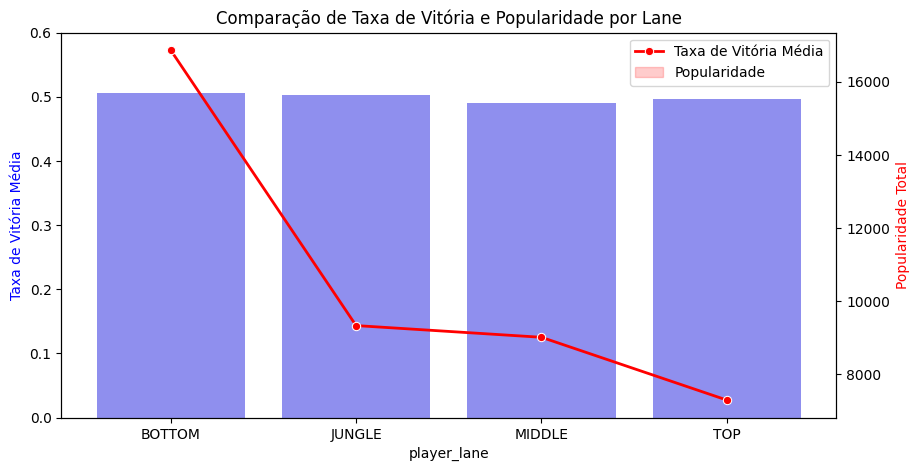

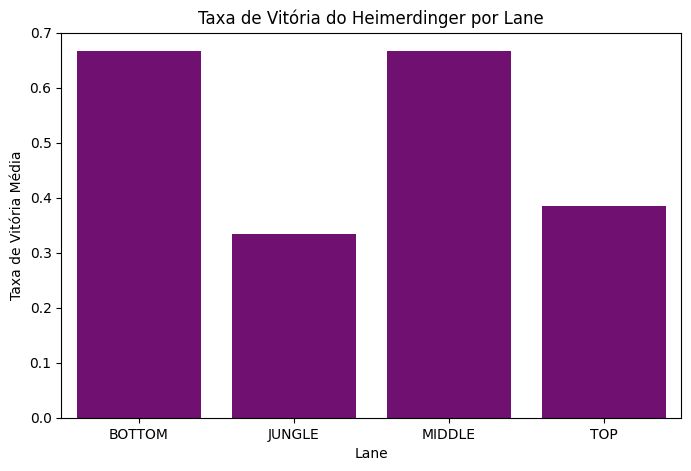

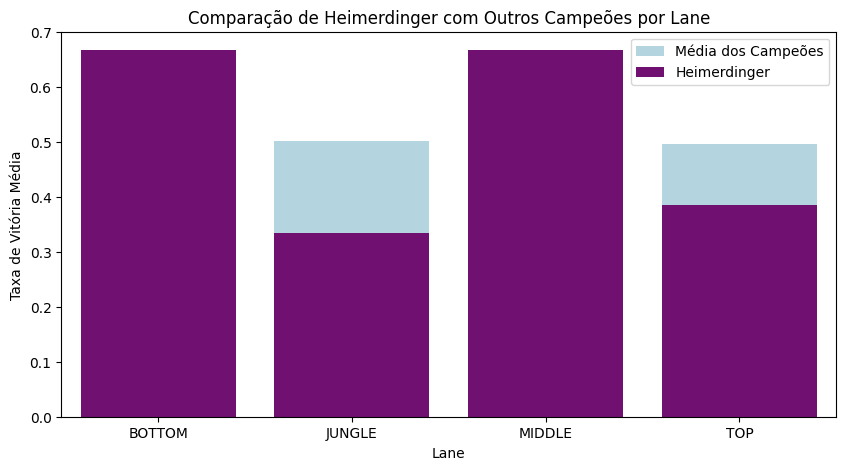

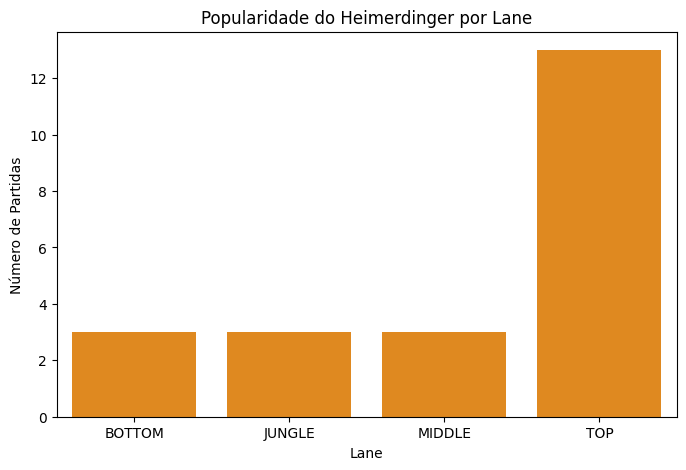


📌 Estatísticas Gerais por Lane:
  player_lane  Taxa_Vitoria_Media  Popularidade
0      BOTTOM            0.505783         16859
1      JUNGLE            0.502196          9335
2      MIDDLE            0.489961          9015
3         TOP            0.496438          7300

📌 Desempenho do Heimerdinger por Lane:
  player_lane  Taxa_Vitoria_Media  Popularidade
0      BOTTOM            0.666667             3
1      JUNGLE            0.333333             3
2      MIDDLE            0.666667             3
3         TOP            0.384615            13


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Carregar os dados do usuário
file_path = "SBGAMES-2matches-final - SBGAMES-2matches-final.csv"  # Altere o caminho conforme necessário
df = pd.read_csv(file_path)

# 📌 Filtrar colunas relevantes
df_filtered = df[['player_champion', 'player_lane', 'binary_win']]

# 📌 Estatísticas gerais por lane (removendo "NONE" se existir)
stats_lane = df_filtered[df_filtered["player_lane"] != "NONE"].groupby("player_lane").agg(
    Taxa_Vitoria_Media=("binary_win", "mean"),
    Popularidade=("player_champion", "count")
).reset_index()

# 📌 Estatísticas do Heimerdinger por lane
heim_stats = df_filtered[df_filtered["player_champion"] == "Heimerdinger"].groupby("player_lane").agg(
    Taxa_Vitoria_Media=("binary_win", "mean"),
    Popularidade=("player_champion", "count")
).reset_index()

# 📊 Gráfico 1 – Comparação de taxa de vitória e popularidade por lane
fig, ax1 = plt.subplots(figsize=(10, 5))

# Barras da taxa de vitória média
sns.barplot(data=stats_lane, x="player_lane", y="Taxa_Vitoria_Media", color="blue", alpha=0.5, ax=ax1)
ax1.set_ylabel("Taxa de Vitória Média", color="blue")
ax1.set_ylim(0, 0.6)
ax1.set_title("Comparação de Taxa de Vitória e Popularidade por Lane")

# Eixo secundário para a popularidade
ax2 = ax1.twinx()
sns.lineplot(data=stats_lane, x="player_lane", y="Popularidade", color="red", marker="o", linewidth=2, ax=ax2)
ax2.set_ylabel("Popularidade Total", color="red")

plt.legend(["Taxa de Vitória Média", "Popularidade"], loc="upper right")
plt.show()

# 📊 Gráfico 2 – Desempenho do Heimerdinger por lane
plt.figure(figsize=(8, 5))
sns.barplot(data=heim_stats, x="player_lane", y="Taxa_Vitoria_Media", color="purple")
plt.title("Taxa de Vitória do Heimerdinger por Lane")
plt.ylabel("Taxa de Vitória Média")
plt.xlabel("Lane")
plt.ylim(0, 0.7)
plt.show()

# 📊 Gráfico 3 – Comparação entre Heimerdinger e a média dos campeões por lane
plt.figure(figsize=(10, 5))
sns.barplot(data=stats_lane, x="player_lane", y="Taxa_Vitoria_Media", color="lightblue", label="Média dos Campeões")
sns.barplot(data=heim_stats, x="player_lane", y="Taxa_Vitoria_Media", color="purple", label="Heimerdinger")
plt.title("Comparação de Heimerdinger com Outros Campeões por Lane")
plt.xlabel("Lane")
plt.ylabel("Taxa de Vitória Média")
plt.legend()
plt.show()

# 📊 Gráfico 4 – Popularidade do Heimerdinger por Lane
plt.figure(figsize=(8, 5))
sns.barplot(data=heim_stats, x="player_lane", y="Popularidade", color="darkorange")
plt.title("Popularidade do Heimerdinger por Lane")
plt.xlabel("Lane")
plt.ylabel("Número de Partidas")
plt.show()

# 📌 Exibir estatísticas
print("\n📌 Estatísticas Gerais por Lane:")
print(stats_lane)

print("\n📌 Desempenho do Heimerdinger por Lane:")
print(heim_stats)


# Analise de suportes

In [7]:
import pandas as pd

# 📌 Carregar os dados do arquivo CSV
df = pd.read_csv("SBGAMES-2matches-final - SBGAMES-2matches-final.csv")

# 📌 Filtrar apenas os jogadores que atuaram na bot lane (BOTTOM)
df_bot = df[df["player_lane"] == "BOTTOM"]

# 📌 Criar um DataFrame para armazenar pares ADC-Suporte
duplas = []

# 📌 Iterar sobre as partidas agrupadas por match_id para encontrar duplas
for match_id, partida in df_bot.groupby("match_id"):
    carry = partida[partida["player_role"] == "CARRY"]
    suporte = partida[partida["player_role"] == "SUPPORT"]

    # 📌 Garantir que há exatamente um CARRY e um SUPPORT na partida
    if not carry.empty and not suporte.empty:
        adc = carry.iloc[0]["player_champion"]
        support = suporte.iloc[0]["player_champion"]
        win = carry.iloc[0]["binary_win"]  # Pegando o resultado do ADC como referência
        lane = carry.iloc[0]["player_lane"]  # Pegando a lane para análise posterior

        duplas.append([adc, support, win, lane])

# 📌 Criar DataFrame com os pares ADC-Suporte e taxa de vitória
df_duplas = pd.DataFrame(duplas, columns=["ADC", "Suporte", "Vitória", "Lane"])

# 📌 Agrupar por ADC-Suporte e calcular estatísticas
df_stats = df_duplas.groupby(["ADC", "Suporte", "Lane"]).agg(
    Taxa_Vitoria=("Vitória", "mean"),
    Partidas_Jogadas=("Vitória", "count")
).reset_index()

# 📌 Filtrar apenas os suportes com melhor desempenho (acima de 50% de taxa de vitória)
df_melhores_suportes = df_stats[df_stats["Taxa_Vitoria"] > 0.5].sort_values(by="Taxa_Vitoria", ascending=False)

# 📌 Salvar os resultados em arquivos CSV
df_stats.to_csv("sinergia_adc_suporte_completo.csv", index=False)
df_melhores_suportes.to_csv("melhores_suportes_adc.csv", index=False)

print("📌 Arquivos gerados com sucesso:")
print(" - 'sinergia_adc_suporte_completo.csv' (todas as duplas)")
print(" - 'melhores_suportes_adc.csv' (apenas os suportes com maior taxa de vitória)")


📌 Arquivos gerados com sucesso:
 - 'sinergia_adc_suporte_completo.csv' (todas as duplas)
 - 'melhores_suportes_adc.csv' (apenas os suportes com maior taxa de vitória)


C:\Users\Filip\AppData\Local\Temp\ipykernel_37804\3845766506.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bot["maestria_aproximada"] = df_bot.groupby(["player_summoner_id", "player_champion"])["match_id"].transform("count")
C:\Users\Filip\AppData\Local\Temp\ipykernel_37804\3845766506.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bot["grupo_maestria"] = df_bot["maestria_aproximada"].apply(lambda x: "Alta" if x >= limite_maestria else "Baixa")


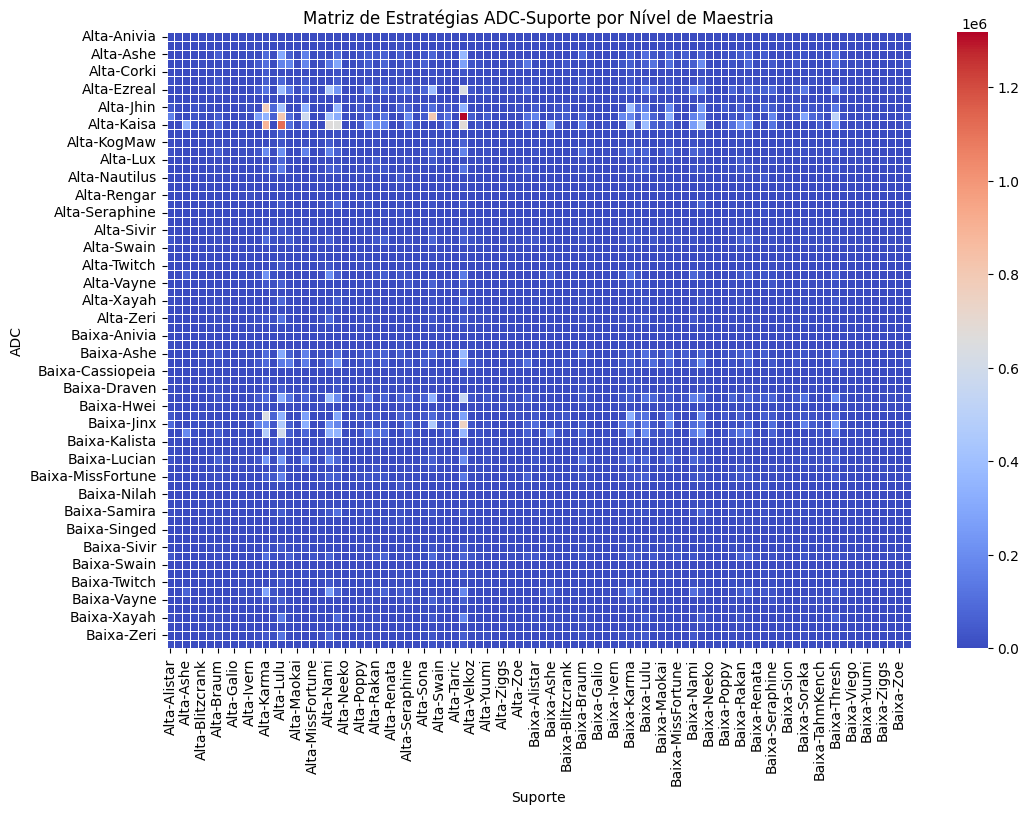

<Figure size 1000x600 with 0 Axes>

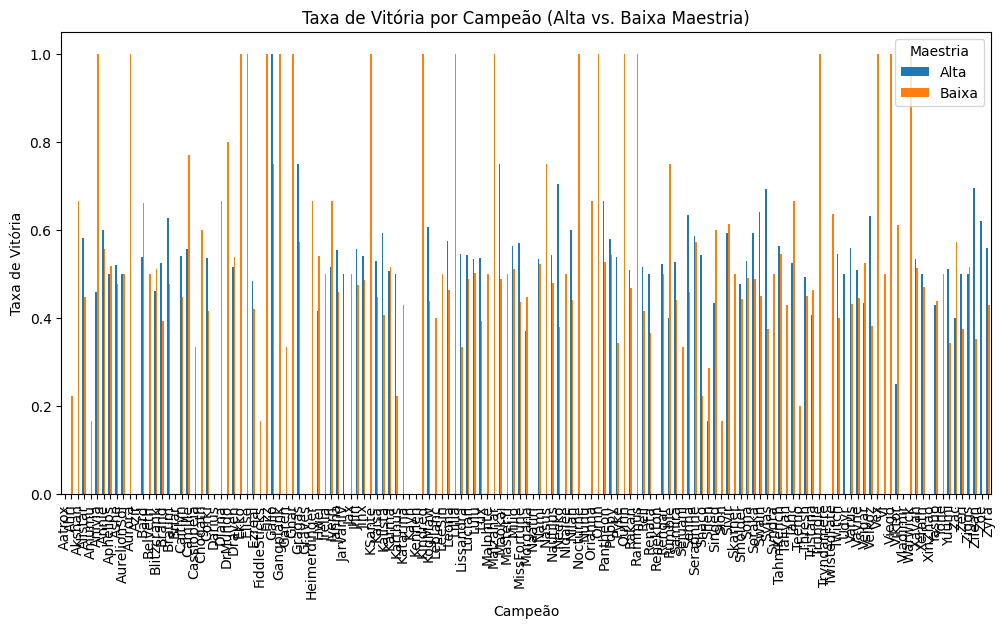

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Carregar os dados do SBGames
df = pd.read_csv("SBGAMES-2matches-final - SBGAMES-2matches-final.csv")

# 📌 Filtrar apenas partidas da bot lane
df_bot = df[df["player_lane"] == "BOTTOM"]

# 📌 Criar uma métrica de maestria por jogador (substitua pelo campo correto do CSV)
# Aqui estou assumindo que maestria pode ser simulada pela quantidade de partidas jogadas com o campeão
df_bot["maestria_aproximada"] = df_bot.groupby(["player_summoner_id", "player_champion"])["match_id"].transform("count")

# 📌 Definir grupos de maestria
limite_maestria = df_bot["maestria_aproximada"].median()
df_bot["grupo_maestria"] = df_bot["maestria_aproximada"].apply(lambda x: "Alta" if x >= limite_maestria else "Baixa")

# 📌 Criar pares ADC-Suporte
df_duplas = df_bot.pivot_table(index="match_id", columns="player_role", values="player_champion", aggfunc="first").reset_index()
df_duplas = df_duplas.rename(columns={"CARRY": "ADC", "SUPPORT": "Suporte"})

# 📌 Associar maestria aos campeões escolhidos
df_duplas = df_duplas.merge(df_bot[["match_id", "player_champion", "grupo_maestria"]], left_on="ADC", right_on="player_champion", how="left")
df_duplas = df_duplas.rename(columns={"grupo_maestria": "ADC_Maestria"}).drop(columns=["player_champion"])

df_duplas = df_duplas.merge(df_bot[["match_id", "player_champion", "grupo_maestria"]], left_on="Suporte", right_on="player_champion", how="left")
df_duplas = df_duplas.rename(columns={"grupo_maestria": "Suporte_Maestria"}).drop(columns=["player_champion"])

# 📌 Criar matriz de estratégias (sinergia ADC-Suporte por maestria)
df_sinergia = df_duplas.groupby(["ADC_Maestria", "Suporte_Maestria", "ADC", "Suporte"]).size().reset_index(name="Frequencia")

# 📌 Criar heatmap para visualizar as escolhas estratégicas
pivot_sinergia = df_sinergia.pivot_table(index=["ADC_Maestria", "ADC"], columns=["Suporte_Maestria", "Suporte"], values="Frequencia", fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_sinergia, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Matriz de Estratégias ADC-Suporte por Nível de Maestria")
plt.xlabel("Suporte")
plt.ylabel("ADC")
plt.show()

# 📌 Analisar taxa de vitória por maestria
df_vitoria = df_bot.groupby(["player_champion", "grupo_maestria"])["binary_win"].mean().reset_index()
df_vitoria_pivot = df_vitoria.pivot(index="player_champion", columns="grupo_maestria", values="binary_win")

plt.figure(figsize=(10, 6))
df_vitoria_pivot.plot(kind="bar", figsize=(12, 6))
plt.title("Taxa de Vitória por Campeão (Alta vs. Baixa Maestria)")
plt.xlabel("Campeão")
plt.ylabel("Taxa de Vitória")
plt.legend(title="Maestria")
plt.show()

# 📌 Salvar os resultados para análise posterior
df_sinergia.to_csv("sinergia_por_maestria.csv", index=False)
df_vitoria.to_csv("taxa_vitoria_maestria.csv", index=False)


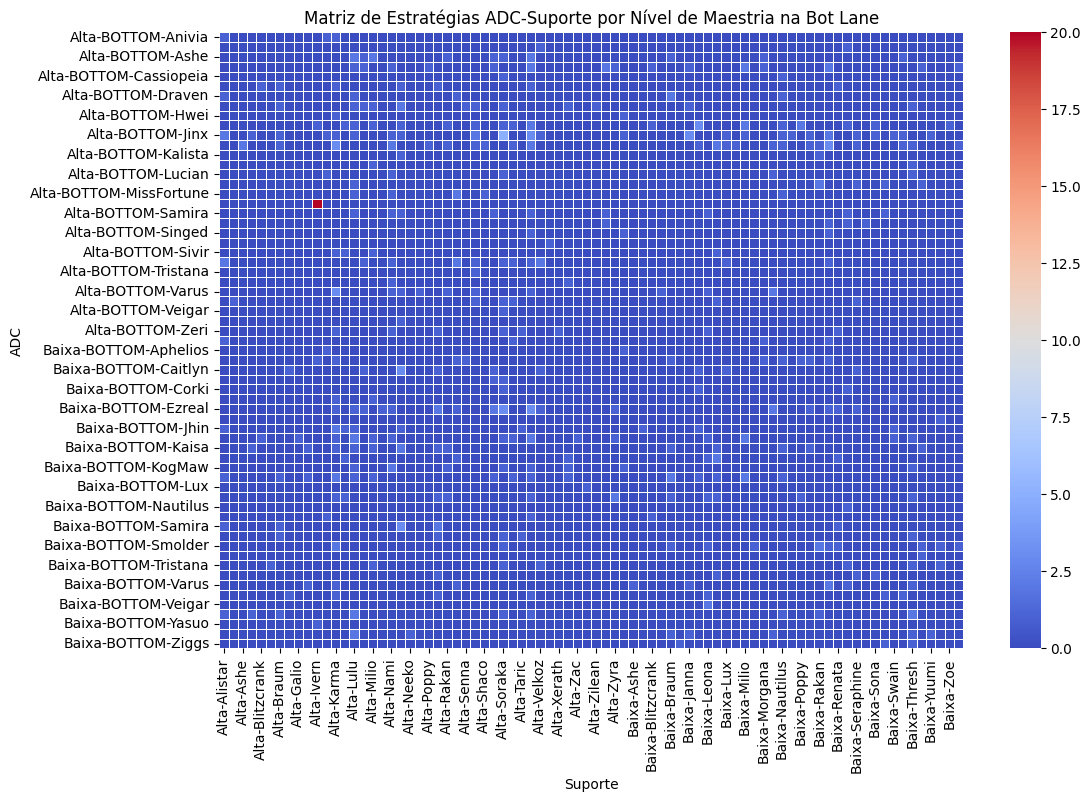

<Figure size 1000x600 with 0 Axes>

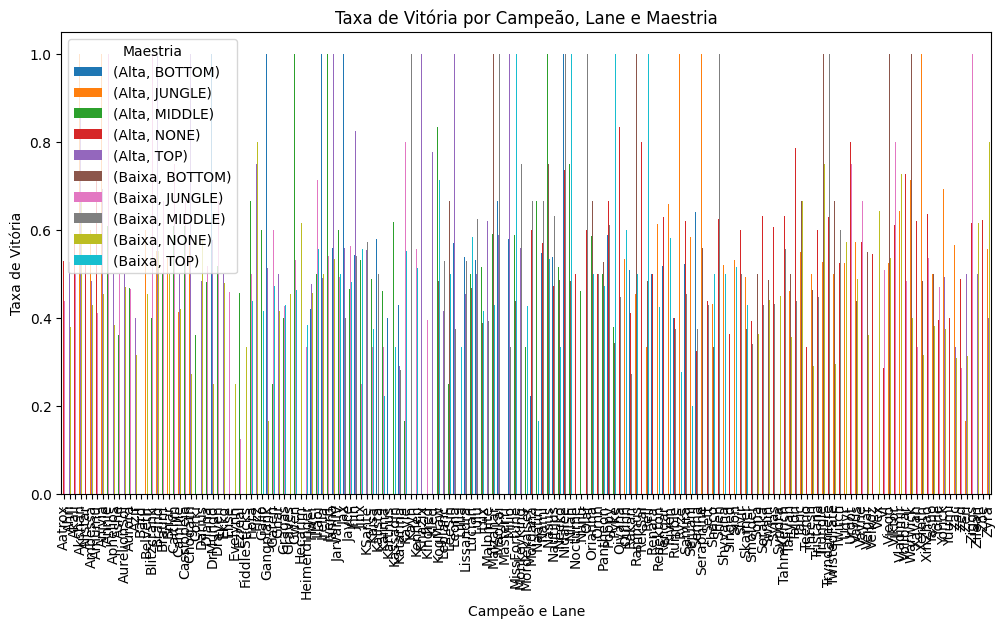

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Carregar os dados do SBGames
df = pd.read_csv("SBGAMES-2matches-final - SBGAMES-2matches-final.csv")

# 📌 Criar uma métrica de maestria por jogador (simulada pela quantidade de partidas jogadas com o campeão)
df["maestria_aproximada"] = df.groupby(["player_summoner_id", "player_champion"])["match_id"].transform("count")

# 📌 Definir grupos de maestria (Alta e Baixa)
limite_maestria = df["maestria_aproximada"].median()
df["grupo_maestria"] = df["maestria_aproximada"].apply(lambda x: "Alta" if x >= limite_maestria else "Baixa")

# 📌 Filtrar apenas partidas na bot lane (onde há ADC e Suporte)
df_bot = df[df["player_lane"] == "BOTTOM"]

# 📌 Criar pares ADC-Suporte para cada partida
df_duplas = df_bot.pivot_table(index="match_id", columns="player_role", values="player_champion", aggfunc="first").reset_index()
df_duplas = df_duplas.rename(columns={"CARRY": "ADC", "SUPPORT": "Suporte"})

# 📌 Adicionar a lane correta (BOTTOM) e mesclar com os dados de maestria
df_duplas["Lane"] = "BOTTOM"

df_duplas = df_duplas.merge(df[["match_id", "player_champion", "grupo_maestria"]], 
                            left_on=["match_id", "ADC"], right_on=["match_id", "player_champion"], 
                            how="left").rename(columns={"grupo_maestria": "ADC_Maestria"}).drop(columns=["player_champion"])

df_duplas = df_duplas.merge(df[["match_id", "player_champion", "grupo_maestria"]], 
                            left_on=["match_id", "Suporte"], right_on=["match_id", "player_champion"], 
                            how="left").rename(columns={"grupo_maestria": "Suporte_Maestria"}).drop(columns=["player_champion"])

# 📌 Criar matriz de estratégias (ADC-Suporte por maestria)
df_sinergia = df_duplas.groupby(["ADC_Maestria", "Suporte_Maestria", "ADC", "Suporte", "Lane"]).size().reset_index(name="Frequencia")

# 📌 Criar heatmap para visualizar as escolhas estratégicas por maestria
pivot_sinergia = df_sinergia.pivot_table(index=["ADC_Maestria", "Lane", "ADC"], 
                                         columns=["Suporte_Maestria", "Suporte"], 
                                         values="Frequencia", fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_sinergia, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Matriz de Estratégias ADC-Suporte por Nível de Maestria na Bot Lane")
plt.xlabel("Suporte")
plt.ylabel("ADC")
plt.show()

# 📌 Analisar taxa de vitória por maestria
df_vitoria = df.groupby(["player_champion", "player_lane", "grupo_maestria"])["binary_win"].mean().reset_index()
df_vitoria_pivot = df_vitoria.pivot(index=["player_champion", "player_lane"], columns="grupo_maestria", values="binary_win")

plt.figure(figsize=(10, 6))
df_vitoria_pivot.unstack().plot(kind="bar", figsize=(12, 6))
plt.title("Taxa de Vitória por Campeão, Lane e Maestria")
plt.xlabel("Campeão e Lane")
plt.ylabel("Taxa de Vitória")
plt.legend(title="Maestria")
plt.show()

# 📌 Salvar os resultados para análise posterior
df_sinergia.to_csv("sinergia_adc_suporte_maestria.csv", index=False)
df_vitoria.to_csv("taxa_vitoria_adc_suporte_maestria.csv", index=False)
